In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Linear classification is uses a linear combination of input features to categorize data into labels
1) linear regression
2) logistic regression
3) support vector machine with linear kernel 
4) linear discrement cassifier
5) Naive bayers classifier
6) gradient descent classifier

# Navie bayes classification : is most popular agorithum for classification model, It assumses that all features are indepent to each other.
-> It calculate the probability of hypothesis(Class label) based on the probability of observing certain evidances(features) 

p(class|features)=(p(features|class)*p((class)))/p(features)

-> p(class|features) : is probability of class given the observed features
-> p(features|class) : is probability of observeing features given the class
-> p(class) : is prior probability of class
-> p(features) : is the probability of the observed features

# let find probability of playing cricket under given conditions
1) Outlook = rain
2) Humadity = High
3) Wind = Week
4) Play = ?

P(Play=Yes∣Outlook=Rain,Humidity=High,Wind=Weak) ∝ P(Outlook=Rain∣Play=Yes)∗P(Humidity=High∣Play=Yes)∗P(Wind=Weak∣Play=Yes)∗P(Play=Yes)

# Project :
Our aim in this project is to predict if a person would buy an iPhone with respect to their gender, age, and income.

In [18]:
df = pd.read_csv('iphone_purchase_records.csv')

In [19]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [21]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [22]:
df.shape

(400, 4)

In [23]:
df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [24]:
columns = df.columns

In [28]:
# independent and dependent dataset
X= df.drop(['Purchase Iphone'],axis=1)
y=df['Purchase Iphone']

In [29]:
# Use LabelEncoder to convert gender to number
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

In [30]:
X.head()

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [35]:
# Splitting Datasets into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)



In [36]:
# feature scaling : it means standardizing data into 1 to -1 range
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [37]:
# Logistic regression classifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='liblinear')
LR.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [38]:
# Predicting logistic regression model on x_test
y_pred = LR.predict(X_test)

In [40]:
# model performance evalution using confusion matrix, accuracy, Recall score(TPR), and Precision (predicted prositive rate)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

cm = confusion_matrix(y_test,y_pred)
print(cm)

accuracy = accuracy_score(y_test,y_pred)
print(round(accuracy,2))

precision = precision_score(y_test,y_pred)
print(round(precision,2))

recall = recall_score(y_test,y_pred)
print(round(recall,))

[[73  6]
 [ 8 33]]
0.88
0.85
1


In [41]:
# feature scaling of X dataset
sc_X = StandardScaler()
X=sc_X.fit_transform(X)

In [42]:
# Comparing the model accuracy for all classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

In [45]:
models = []
scores = []
names = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT',DecisionTreeClassifier(criterion='entropy')))
models.append(('RC',RandomForestClassifier(n_estimators=100,criterion='entropy')))
models.append(('SVM', SVC(kernel='rbf', gamma='scale')))
models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)))

In [46]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=10, shuffle=True)
    result = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    scores.append(round(result.mean(),2))
    names.append(name)
    print("%s : mean Accuracy = %.2f%% - SD Acurracy = %.2f%%" %(name, result.mean()*100, result.std()*100))

LR : mean Accuracy = 84.75% - SD Acurracy = 5.64%
DT : mean Accuracy = 85.00% - SD Acurracy = 4.33%
RC : mean Accuracy = 89.00% - SD Acurracy = 4.50%
SVM : mean Accuracy = 90.75% - SD Acurracy = 4.48%
GNB : mean Accuracy = 89.25% - SD Acurracy = 4.48%
KNN : mean Accuracy = 90.75% - SD Acurracy = 5.13%


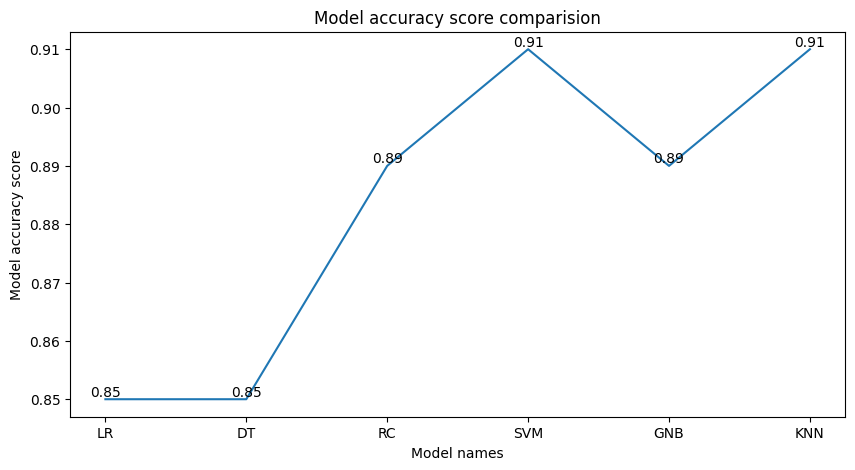

In [57]:
plt.figure(figsize=(10,5))
plt.plot(names,scores)
plt.xlabel('Model names')
plt.ylabel('Model accuracy score')
plt.title('Model accuracy score comparision')

# Annotate each data point with its score
for i, score in enumerate(scores):
    plt.text(names[i], score, f'{score:.2f}', ha='center', va='bottom')
plt.show()

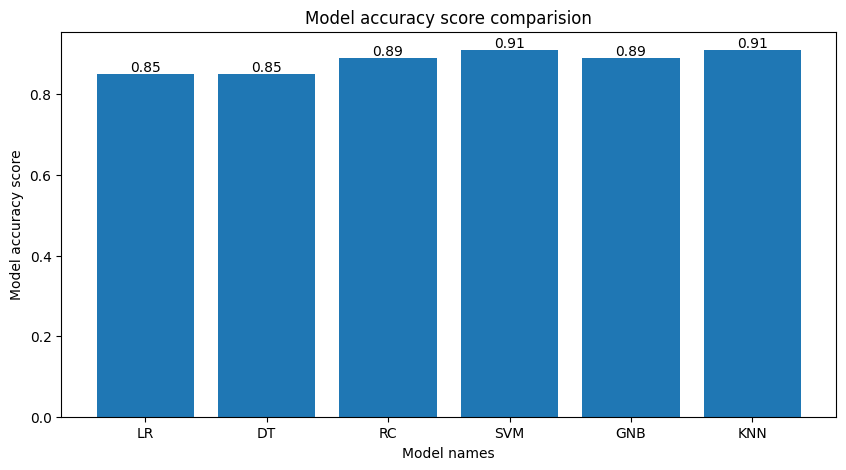

In [58]:
plt.figure(figsize=(10,5))
plt.bar(names,scores)
plt.xlabel('Model names')
plt.ylabel('Model accuracy score')
plt.title('Model accuracy score comparision')

# Annotate each data point with its score
for i, score in enumerate(scores):
    plt.text(names[i], score, f'{score:.2f}', ha='center', va='bottom')
plt.show()